In [4]:
#!pip install git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

In [5]:
import pandas as pd
import numpy as np
import datetime
import spacy
import lucem_illud

In [6]:
#connect with drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [7]:
%cd /content/gdrive/MyDrive/Bo_RA/

/content/gdrive/MyDrive/Bo_RA


In [8]:
ios_df = pd.read_stata('ios_app_versions_versions_US.dta')
ios_df.head()

,app_id,version,description,date
0,1000017994,2.9.4,Updates in Cardiogram 2.9.4:\n• Links now open...,2018-06-28
1,1000017994,2.10.0,Updates in Cardiogram 2.10.0:\n• Stability imp...,2019-04-04
2,1000017994,3.1.8,Thanks so much for using Cardiogram!\n\nApple ...,2020-03-19
3,1000017994,3.4.0,ECG support is here. \n\nAll users with an App...,2021-03-06
4,1000017994,2.9.15,Updates in Cardiogram 2.9.15:\n• Fixes to data...,2018-11-08


## Task 1
- At the app-month level, calculate the number of version updates for both iOs and Android apps.

,num_update
count,593805.000000
mean,1.942021
std,1.337044
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,27.000000


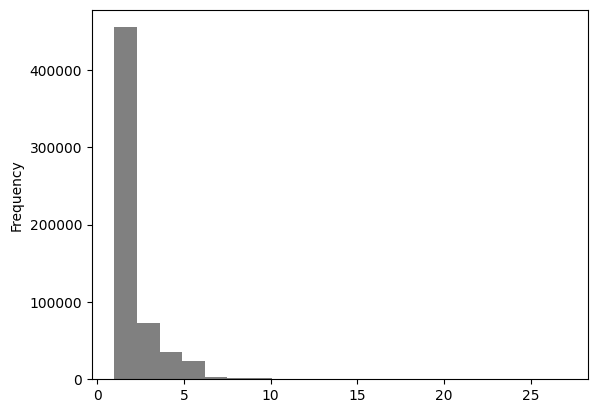

In [9]:
ios_df['ym'] = pd.to_datetime(ios_df['date']).dt.to_period('M')
count_df = ios_df.groupby(['app_id', 'ym']).count().reset_index()[['app_id', 'ym', 'version']]
count_df = count_df.rename(columns = {'version': 'num_update'})
count_df.to_csv('num_update_app_month.csv')
count_df['num_update'].plot.hist(bins=20, color = 'grey');
count_df.describe()

## Task 2
- At the app-update level, construct the total length of the text per version update description (drop unnecessary characters, indents, and blank spaces). Length is measured both in characters and in words.

In [10]:
nlp = spacy.load("en_core_web_sm")

In [11]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [12]:
%%time
ios_df['description'] = ios_df['description'].apply(lambda x: x.replace('\n', '').replace('-', '')\
                                                    .replace('•', '').replace('*', '').replace('◉', '')\
                                                    .replace('•','').replace('+', ''))
#deal with special cases

CPU times: user 2.1 s, sys: 150 ms, total: 2.25 s
Wall time: 2.26 s


In [13]:
%%time
ios_df['description_tk'] =  ios_df['description'].apply(lambda x: lucem_illud.word_tokenize(x))

CPU times: user 1h 24min 37s, sys: 21.6 s, total: 1h 24min 59s
Wall time: 1h 24min 51s


In [14]:
ios_df['len_word'] = ios_df['description_tk'].apply(lambda x: len(x))

In [15]:
ios_df['len_char'] = ios_df['description_tk'].apply(lambda x: len(''.join(x)))

In [16]:
ios_df

,app_id,version,description,date,ym,description_tk,len_word,len_char
0,1000017994,2.9.4,Updates in Cardiogram 2.9.4: Links now open wi...,2018-06-28,2018-06,"[Updates, in, Cardiogram, 2.9.4, Links, now, o...",36,166
1,1000017994,2.10.0,Updates in Cardiogram 2.10.0: Stability improv...,2019-04-04,2019-04,"[Updates, in, Cardiogram, 2.10.0, Stability, i...",30,152
2,1000017994,3.1.8,Thanks so much for using Cardiogram!Apple Watc...,2020-03-19,2020-03,"[Thanks, so, much, for, using, Cardiogram!Appl...",82,390
3,1000017994,3.4.0,ECG support is here. All users with an Apple W...,2021-03-06,2021-03,"[ECG, support, is, here, All, users, with, an,...",32,159
4,1000017994,2.9.15,Updates in Cardiogram 2.9.15: Fixes to data sy...,2018-11-08,2018-11,"[Updates, in, Cardiogram, 2.9.15, Fixes, to, d...",37,172
...,...,...,...,...,...,...,...,...
1153177,999924447,2.0,Thanks for playing Cube Escape Small bug fixe...,2018-03-02,2018-03,"[Thanks, for, playing, Cube, Escape, Small, bu...",11,55
1153178,999924447,2.1,Thank you for playing Cube Escape: Harvey's Bo...,2019-02-24,2019-02,"[Thank, you, for, playing, Cube, Escape, Harve...",18,70
1153179,999924447,3.1,Thank you for playing Cube Escape: Harvey's Bo...,2021-06-09,2021-06,"[Thank, you, for, playing, Cube, Escape, Harve...",18,70
1153180,999924447,1.3,None,2015-06-24,2015-06,[None],1,4


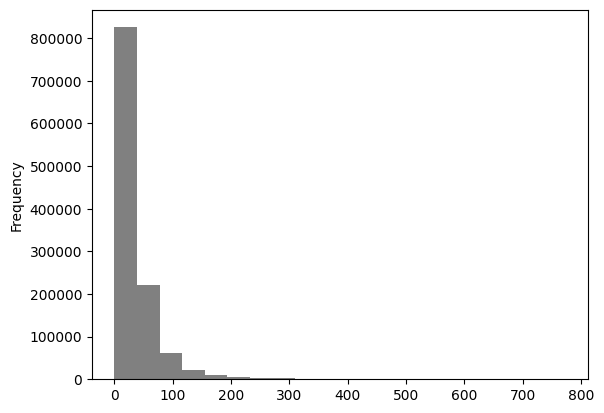

In [26]:
ios_df['len_word'].plot.hist(bins=20, color = 'grey');

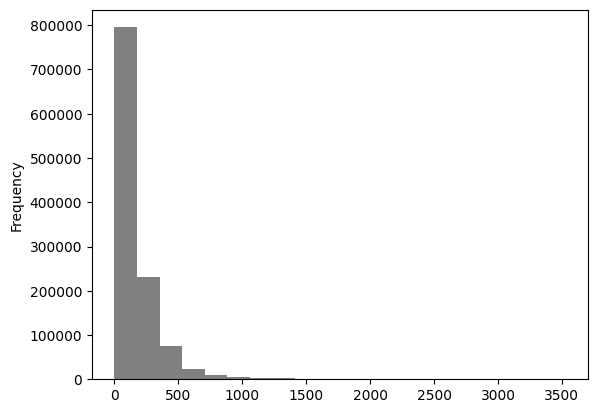

In [25]:
ios_df['len_char'].plot.hist(bins=20, color = 'grey');

## Task 3
- (open-ended) determine major version updates for each app. Some version update descriptions mention "major updates," while others say "minor fixes". No unified keywords indicate major version updates across all apps, so you may come up with a dictionary based on some examples. Another way to do this is that version updates from 1.1.4 to 1.2 is more likely to be major update compared to version updates from 1.1.4 to 1.1.5. You can construct multiple measures based on the version update descriptions and version codes.

In [18]:
ios_df = ios_df.sort_values(['app_id', 'version'])
ios_df['version_lag'] = ios_df.groupby('app_id').shift(1)['version']

In [19]:
def update_by_num(row):
    #1 means major revision (change of the first digit)
    #2 means minor revision (change of the second digit)
    #3 means maintanence (change of the third digit)
    #https://dl.acm.org/doi/abs/10.1145/2600428.2609560
    cur_ver = row['version']#.split('.')
    lag_ver = row['version_lag']#.split('.')
    update = np.NaN
    if type(cur_ver) == str and type(lag_ver) == str:
        cur_ver = row['version'].split('.')
        lag_ver = row['version_lag'].split('.')
        for i in range(min(len(cur_ver), len(lag_ver))):
            if cur_ver[i] != lag_ver[i]:
                update = i+1
    return update

In [20]:
ios_df['update_by_num'] = ios_df.apply(update_by_num, axis = 1)
ios_df.head()

,app_id,version,description,date,ym,description_tk,len_word,len_char,version_lag,update_by_num
88,1000017994,0.8.9,Redesigned chart! Lots of bug fixes and UI im...,2015-09-10,2015-09,"[Redesigned, chart, Lots, of, bug, fixes, and,...",9,46,NaN,NaN
15,1000017994,0.87,Show running and cycling pace overlayed with ...,2015-08-15,2015-08,"[Show, running, and, cycling, pace, overlayed,...",13,66,0.8.9,2.0
43,1000017994,0.9.0,Redesigned user interface New feature! Histog...,2015-11-25,2015-11,"[Redesigned, user, interface, New, feature, Hi...",37,184,0.87,2.0
14,1000017994,0.9.2,Critical bug fix: fix caching bug that would ...,2015-12-02,2015-12,"[Critical, bug, fix, fix, caching, bug, that, ...",27,117,0.9.0,3.0
22,1000017994,0.9.3,Compatible with iPhone 5 and iPhone 5c Major ...,2015-12-17,2015-12,"[Compatible, with, iPhone, 5, and, iPhone, 5c,...",25,120,0.9.2,3.0


In [21]:
ios_df.to_pickle('ios.pickle')

In [27]:
ios_df.describe()[1:]

,len_word,len_char,update_by_num
mean,32.772991,162.999851,2.637455
std,46.888848,225.011661,0.525739
min,0.000000,0.000000,1.000000
25%,5.000000,34.000000,2.000000
50%,18.000000,96.000000,3.000000
75%,43.000000,212.000000,3.000000
max,773.000000,3527.000000,5.000000


In [28]:
ios_df['update_by_num'].value_counts()

3.0    693676
2.0    360116
1.0     18222
4.0      5283
5.0       300
Name: update_by_num, dtype: int64

In [42]:
print(np.shape(ios_df[ios_df['update_by_num'] == 5].groupby('app_id').count())[0]) #only 8 app
ios_df[ios_df['update_by_num'] == 5].head() #sanity check

8


,app_id,version,description,date,ym,description_tk,len_word,len_char,version_lag,update_by_num
28247,1033794044,1.0.0.0.38,1. Support iPad2. Add traffic data feature of ...,2016-05-03,2016-05,"[1, Support, iPad2, Add, traffic, data, featur...",75,402,1.0.0.0.33,5.0
28201,1033794044,1.0.0.0.40,1. Fix bugs.2. Fix that Quick Internet Setup f...,2016-05-12,2016-05,"[1, Fix, bugs.2, Fix, that, Quick, Internet, S...",12,52,1.0.0.0.38,5.0
28210,1033794044,1.0.0.0.47,1. Add the feature of changing language.2. Fix...,2016-08-10,2016-08,"[1, Add, the, feature, of, changing, language....",24,129,1.0.0.0.40,5.0
28258,1033794044,1.0.0.0.60,1. Support GTAC53002. Fix bug that sometimes c...,2017-03-12,2017-03,"[1, Support, GTAC53002, Fix, bug, that, someti...",30,142,1.0.0.0.47,5.0
28183,1033794044,1.0.0.0.61,Fix some issue,2017-04-17,2017-04,"[Fix, some, issue]",3,12,1.0.0.0.60,5.0


In [43]:
print(np.shape(ios_df[ios_df['update_by_num'] == 4].groupby('app_id').count())[0]) #only 8 app
ios_df[ios_df['update_by_num'] == 4].head() #sanity check

293


,app_id,version,description,date,ym,description_tk,len_word,len_char,version_lag,update_by_num
616,1001285466,4.18.11.4,Hello HealthyWage Participants!We are continui...,2020-02-12,2020-02,"[Hello, HealthyWage, Participants!We, are, con...",41,229,4.18.10.5,4.0
681,1001285466,4.18.12.2,Hello HealthyWage Participants!We are continui...,2020-02-15,2020-02,"[Hello, HealthyWage, Participants!We, are, con...",70,375,4.18.11.4,4.0
657,1001285466,4.18.14.0,Hello HealthyWage Participants!We are continui...,2020-02-21,2020-02,"[Hello, HealthyWage, Participants!We, are, con...",39,247,4.18.12.2,4.0
570,1001285466,4.18.19.6,Hello HealthyWage Participants!We are continui...,2020-03-13,2020-03,"[Hello, HealthyWage, Participants!We, are, con...",65,359,4.18.14.0,4.0
597,1001285466,4.18.20.1,Hello HealthyWage Participants!We are continui...,2020-03-18,2020-03,"[Hello, HealthyWage, Participants!We, are, con...",79,411,4.18.19.6,4.0
